In [12]:
import pandas as pd
import sqlite3 as db
import matplotlib.pyplot as plt

# 1. Connect to database, extract data to perform EDA on

In [ ]:
path = "C:/Users/Anton/Documents/Anton_Gollbo/Skolarbete/projects/Hemnet_Housing/data"
try:
    conn = db.connect(f"{path}/hemnet_database.db")    
    c = conn.cursor()
except Exception as e:
    print(e)
c.execute("SELECT * FROM housing_objects WHERE district = 'vasastan'")
print(c.fetchall())
vasastan_list = c.fetchall()

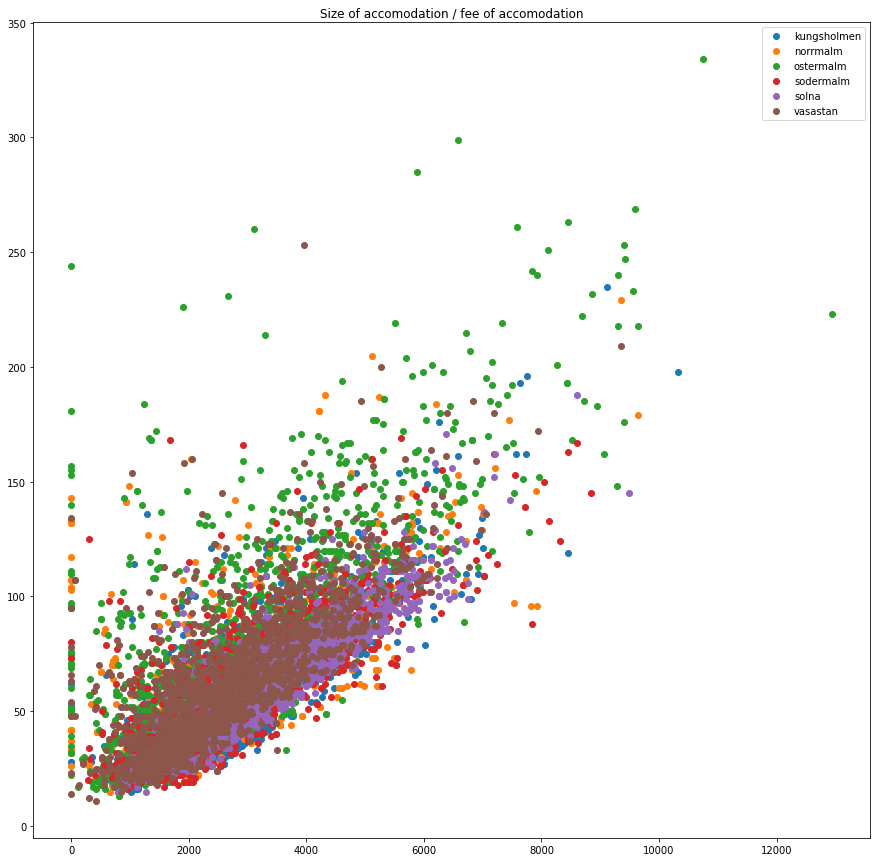

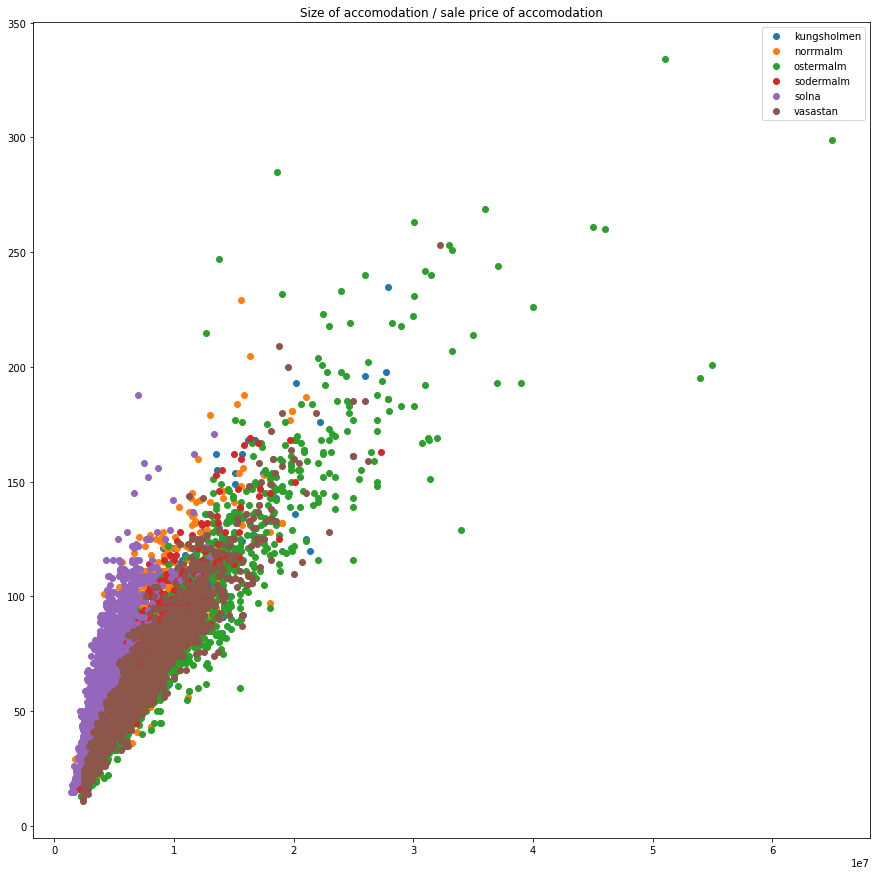

In [70]:
#Read data
data = pd.read_sql_query(f"SELECT * FROM housing_objects ", conn)
#Group data object by the different districts
groups = data.groupby("district")

#Scatter plot of size / fee 
plt.figure(figsize=(15,15))
for name, group in groups:
    plt.plot(group["fee"], group["size"], marker="o", linestyle="", label=name)
plt.legend()
plt.title("Size of accomodation / fee of accomodation")
plt.show()

#Scatter plot of size / final sale price
plt.figure(figsize=(15,15))
for name, group in groups:
    plt.plot(group["sale_price"], group["size"], marker="o", linestyle="", label=name)
plt.legend()
plt.title("Size of accomodation / sale price of accomodation")
plt.show()



In [54]:
df_district = pd.read_sql_query("SELECT * FROM housing_objects ORDER BY fee desc LIMIT 5", conn)

In [52]:
df_district

,index,adress,fee,features,sale_price,sold_date,value_dev,ppsqm,district,size,rooms,floor,Latitude,Longitude,NearbyPOIs
0,6185,brahegatan 23,12945,NaN,22500000,27 september 2019,2,100897,ostermalm,223,6,None,59.339452,18.077316,126.0
1,5975,eriksbergsgatan 13,10755,2.0,51000000,19 december 2019,4,152695,ostermalm,334,9,None,59.340853,18.068390,81.0
2,2442,norr mälarstrand 62,10328,3.0,27700000,8 december 2021,11,139899,kungsholmen,198,6,None,59.327895,18.034744,34.0
3,10796,kammakargatan 38,9650,NaN,13000000,12 april 2014,-4,72626,norrmalm,179,6,None,59.338052,18.058090,229.0
4,6192,karlavägen 83,9637,NaN,23000000,26 september 2019,2,105505,ostermalm,218,6,None,59.338402,18.087616,67.0
